In [101]:
import numpy as np
import pandas as pd

In [102]:
df = pd.read_csv("spam.csv")

In [103]:
df.sample(4)

,Category,Message
2199,ham,I'm in a movie. Call me 4 wat?
2281,ham,R ü comin back for dinner?
2178,ham,Oh k :)why you got job then whats up?
3916,ham,Ard 530 lor. I ok then message ü lor.


In [104]:
df.shape

(5572, 2)

In [105]:
# steps involved in making of model

# Data Cleaning
# EDA
# Text processing
# Model Building
# Evaluation
# Improvement
# Website Making
# Deployment


1 Data Cleaning


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [107]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [108]:
# renaming the columns 
df.rename(columns={'Category':'target','Message':'text'},inplace=True)

In [109]:
df.sample(3)

,target,text
2439,ham,I not busy juz dun wan 2 go so early.. Hee..
3172,ham,Still otside le..u come 2morrow maga..
2863,spam,Adult 18 Content Your video will be with you s...


In [110]:
#check whether is any missing data 

df.isnull().sum()

target    0
text      0
dtype: int64

In [111]:
# giving numerical value to the columns

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [112]:
df['target']= encoder.fit_transform(df['target'])

In [113]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [114]:
# check of duplicate value

df.duplicated().sum()

np.int64(415)

In [115]:
# removal of duplicate value

df = df.drop_duplicates(keep = 'first')

In [116]:
df.duplicated().sum()

np.int64(0)

In [117]:
df.shape

(5157, 2)

2. EDA
   

In [118]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [119]:
df['target'].value_counts()

target
0    4516
1     641
Name: count, dtype: int64

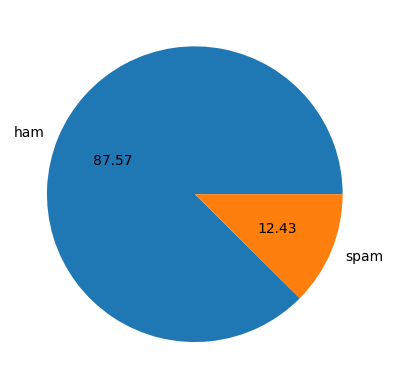

In [120]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [121]:
# here we saw that the data is imbalanced


In [122]:
import nltk

In [123]:
!pip install nltk

In [124]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/monsterking/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/monsterking/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/monsterking/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [125]:
df['num_character'] = df['text'].apply(len)

In [126]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [127]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [128]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [129]:
from nltk.tokenize import sent_tokenize
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [130]:
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [131]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [132]:
# ham message
df[df['target']==0][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [133]:
#spam message
df[df['target']==1][['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [134]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

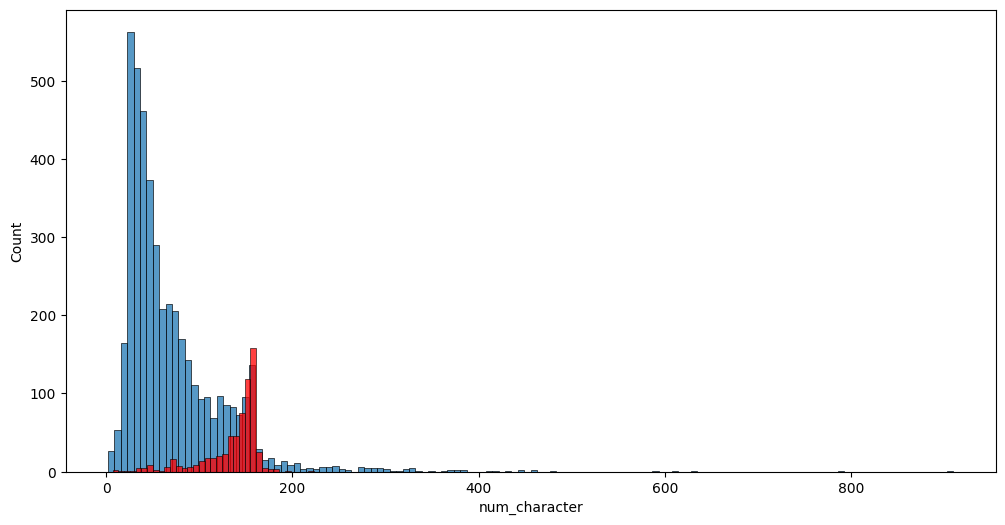

In [135]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0 ]['num_character'])
sns.histplot(df[df['target'] == 1 ]['num_character'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

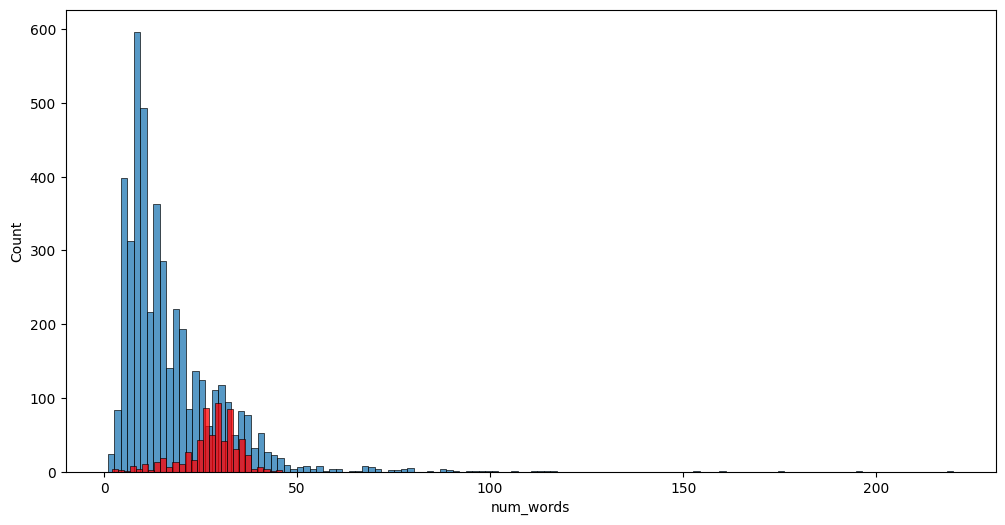

In [136]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0 ]['num_words'])
sns.histplot(df[df['target'] == 1 ]['num_words'], color='red')

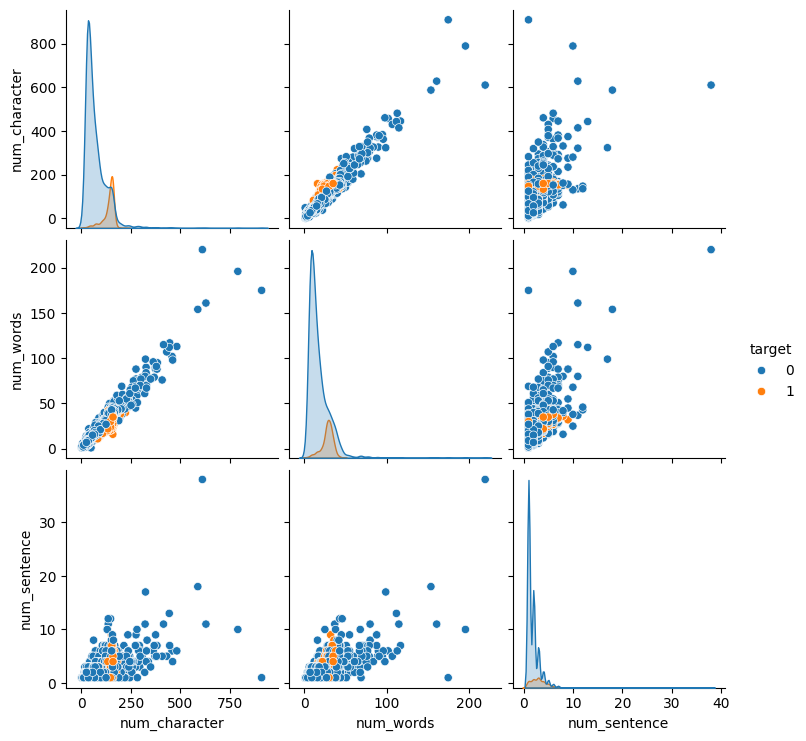

In [137]:
sns.pairplot(df,hue='target')

<Axes: >

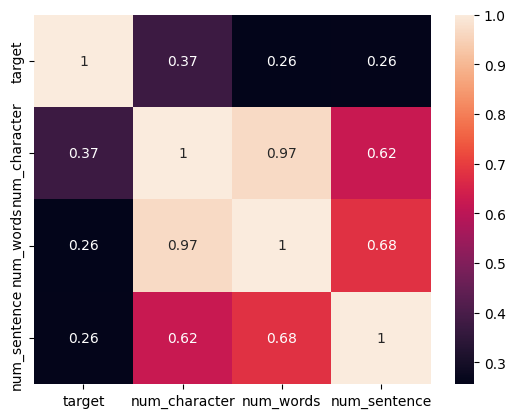

In [138]:
sns.heatmap(df.corr(numeric_only=True), annot = True)


In [139]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download('stopwords')
ps =  PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/monsterking/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#3
. Data Preprocessing
#Lower case
#Tokenization
#Removing special characters
#Removing stop words and punctuation
#Stemming


In [140]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)    



In [141]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [142]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [143]:
ps.stem('loved')

'love'

In [144]:
df['transformed_text'] = df['text'].apply(transform_text)

In [145]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [146]:
!pip install wordcloud

In [147]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [148]:
spam_wc = wc.generate(df[df['target']==1] ['transformed_text'].str.cat(sep=" "))

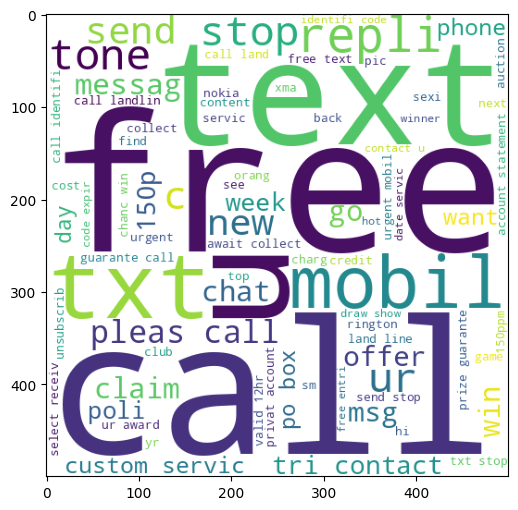

In [149]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [150]:
ham_wc = wc.generate(df[df['target']==0] ['transformed_text'].str.cat(sep=" "))

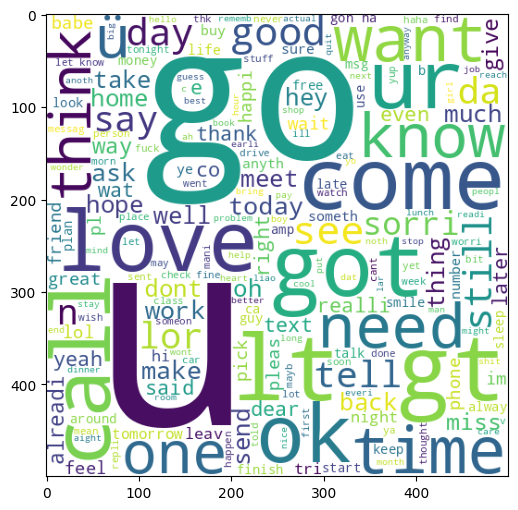

In [151]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [152]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [153]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [154]:
len(spam_corpus)

9781

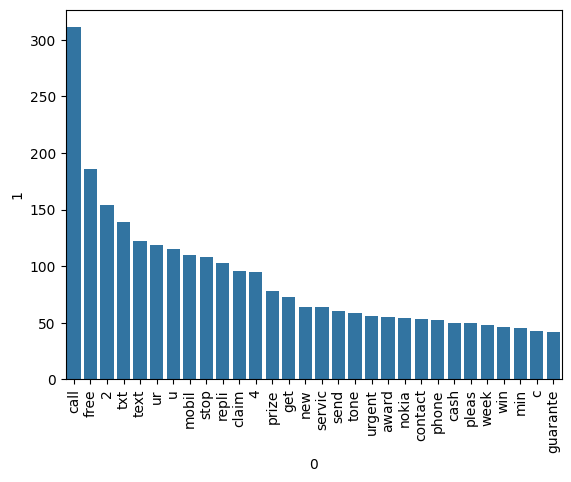

In [155]:
from collections import Counter
sns.barplot( x= pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y= pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [156]:
ham_corpus = []
for msg in df[df['target'] == 0 ]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [157]:
len(ham_corpus)

35940

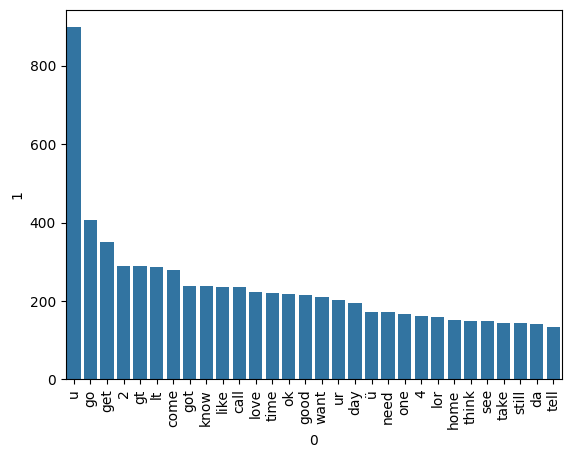

In [158]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [159]:
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


4.Model Building

In [160]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [161]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [162]:
X.shape

(5157, 3000)

In [163]:

y=df['target'].values


In [164]:
from sklearn.model_selection import train_test_split

In [165]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [166]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [167]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [168]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672480620155039
[[786 119]
 [ 18 109]]
0.4780701754385965


In [169]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9718992248062015
[[905   0]
 [ 29  98]]
1.0


In [170]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9825581395348837
[[903   2]
 [ 16 111]]
0.9823008849557522


In [171]:
# tfidf --> MNB

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier


In [173]:


svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)



In [174]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    # 'xgb':xgb
}

In [204]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [205]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9777131782945736, 0.9905660377358491)

In [177]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9777131782945736
Precision -  0.9905660377358491
For KN
Accuracy -  0.9127906976744186
Precision -  1.0
For NB
Accuracy -  0.9718992248062015
Precision -  1.0
For DT
Accuracy -  0.935077519379845
Precision -  0.8125
For LR
Accuracy -  0.9583333333333334
Precision -  0.9375
For RF
Accuracy -  0.9718992248062015
Precision -  1.0
For AdaBoost
Accuracy -  0.9302325581395349
Precision -  0.8666666666666667
For BgC
Accuracy -  0.9612403100775194
Precision -  0.8918918918918919
For ETC
Accuracy -  0.9806201550387597
Precision -  1.0
For GBDT
Accuracy -  0.9573643410852714
Precision -  0.9770114942528736


In [178]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [179]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.971899,1.000000
8,ETC,0.980620,1.000000
5,RF,0.971899,1.000000
0,SVC,0.977713,0.990566
9,GBDT,0.957364,0.977011
4,LR,0.958333,0.937500
7,BgC,0.961240,0.891892
6,AdaBoost,0.930233,0.866667
3,DT,0.935078,0.812500


In [180]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [181]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.971899
2,ETC,Accuracy,0.980620
3,RF,Accuracy,0.971899
4,SVC,Accuracy,0.977713
5,GBDT,Accuracy,0.957364
6,LR,Accuracy,0.958333
7,BgC,Accuracy,0.961240
8,AdaBoost,Accuracy,0.930233
9,DT,Accuracy,0.935078


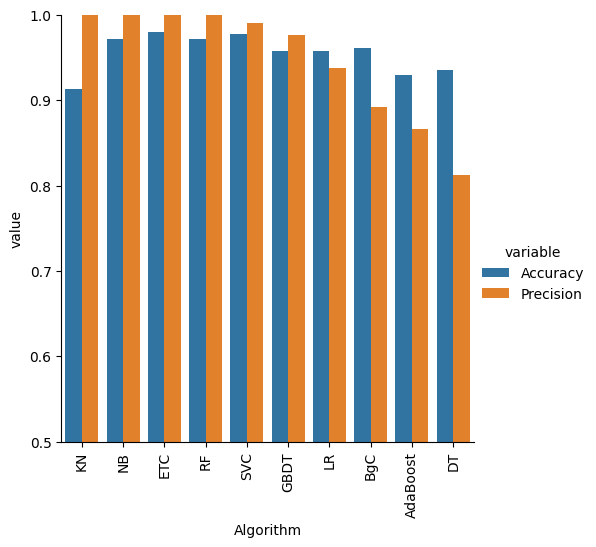

In [182]:
sns.catplot(x = 'Algorithm',y = 'value',
           hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [183]:
# model improve 
# 1. change the max_features parameter of TfIdf

In [184]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [185]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [186]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [187]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [188]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [189]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000,0.912791,1.000000
1,NB,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
2,ETC,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000
3,RF,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000,0.971899,1.000000
4,SVC,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566,0.977713,0.990566
5,GBDT,0.957364,0.977011,0.957364,0.977011,0.957364,0.977011,0.957364,0.977011
6,LR,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500,0.958333,0.937500
7,BgC,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892,0.961240,0.891892
8,AdaBoost,0.930233,0.866667,0.930233,0.866667,0.930233,0.866667,0.930233,0.866667
9,DT,0.935078,0.812500,0.935078,0.812500,0.935078,0.812500,0.935078,0.812500


In [190]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [191]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [192]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [193]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9815891472868217
Precision 1.0


In [194]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [195]:
from sklearn.ensemble import StackingClassifier


In [196]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)


In [197]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9825581395348837
Precision 0.9739130434782609


In [211]:
from sklearn.naive_bayes import MultinomialNB

# vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text'])
y = df['target']

# model training
mnb = MultinomialNB()
mnb.fit(X, y)



,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [212]:
print(mnb)


MultinomialNB()


In [213]:


import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

print("done")

done
